In [42]:
import bilby
import numpy as np
import pandas as pd
import pylab
from astropy.table import Table
import astropy.cosmology as cosmo

name = 'fixHLV5'
outdir1 = 'data/simlogs/'+name+'_uni'
outdir2 = 'data/simlogs/'+name+'_fix'

In [43]:
run_data = pd.read_csv('data/'+name+'_injection_parameters.csv')

for key in run_data:
    if key == 'id':
        run_data[key] = name
    else:
        run_data[key] = float(run_data[key])

In [44]:
result_uni = bilby.core.result.read_in_result(outdir1+'/result/'+name+'_uni_0_result.json')
result_fix = bilby.core.result.read_in_result(outdir2+'/result/'+name+'_fix_0_result.json')

In [45]:
def param_plot(parameter, xlim=None):
    parameter_uni = result_uni.posterior[parameter].values
    parameter_fix = result_fix.posterior[parameter].values
    
    lower_bound1 = np.quantile(parameter_uni, 0.05)
    upper_bound1 = np.quantile(parameter_uni, 0.95)
    median1 = np.median(parameter_uni)
    mean1 = np.mean(parameter_uni)
    std1 = np.std(parameter_uni)
    
    lower_bound2 = np.quantile(parameter_fix, 0.05)
    upper_bound2 = np.quantile(parameter_fix, 0.95)
    median2 = np.median(parameter_fix)
    mean2 = np.mean(parameter_fix)
    std2 = np.std(parameter_fix)
    
    run_data['uni_'+parameter+'_med'] = median1
    run_data['uni_'+parameter+'_upper'] = upper_bound1
    run_data['uni_'+parameter+'_lower'] = lower_bound1
    run_data['uni_'+parameter+'_avg'] = mean1
    run_data['uni_'+parameter+'_std'] = std1
    
    run_data['fix_'+parameter+'_med'] = median2
    run_data['fix_'+parameter+'_upper'] = upper_bound2
    run_data['fix_'+parameter+'_lower'] = lower_bound2
    run_data['fix_'+parameter+'_avg'] = mean2
    run_data['fix_'+parameter+'_std'] = std2
    
    fig, (ax1, ax2) = pylab.subplots(1, 2, figsize=(15,5))
    ax1.hist(parameter_uni, bins=100)
    ax1.axvspan(lower_bound1, upper_bound1, color='C1', alpha=0.2)
    ax1.axvline(median1, color='C1')
    ax1.axvline(run_data[parameter].values[0], color='k', linestyle='--')
    ax1.set_xlabel(parameter)
    if xlim: ax1.set_xlim(xlim[0], xlim[1])
    ax1.set_title(parameter+', default')
    ax2.hist(parameter_fix, bins=100)
    ax2.axvspan(lower_bound2, upper_bound2, color='C1', alpha=0.2)
    ax2.axvline(median2, color='C1')
    ax2.axvline(run_data[parameter].values[0], color='k', linestyle='--')
    ax2.set_xlabel(parameter)
    if xlim: ax2.set_xlim(xlim[0], xlim[1])
    ax2.set_title(parameter+', ra/dec fixed')
    return pylab.show()

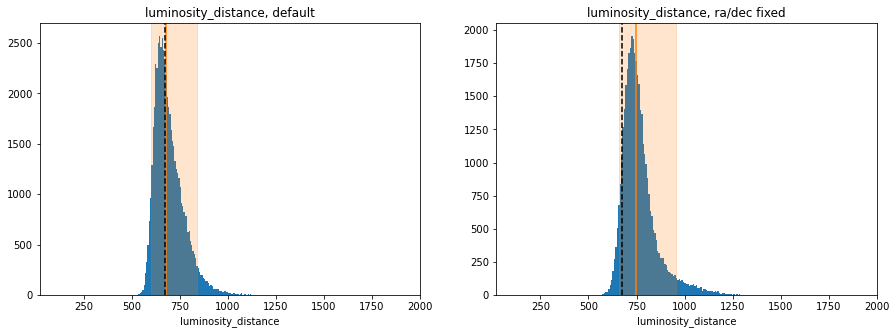

In [46]:
param_plot("luminosity_distance", xlim=(20, 2000))

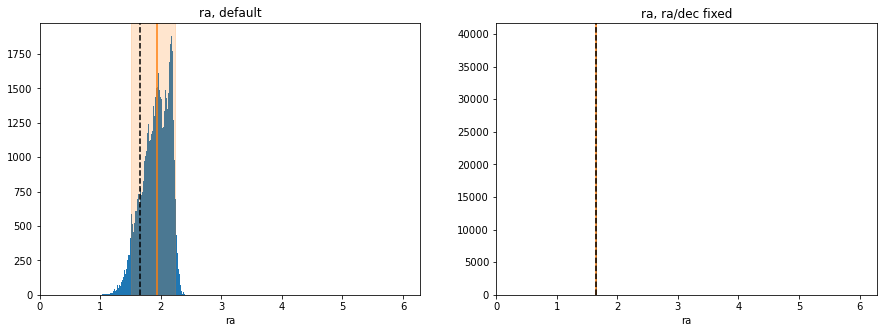

In [47]:
param_plot("ra", xlim=(0, 2*np.pi))

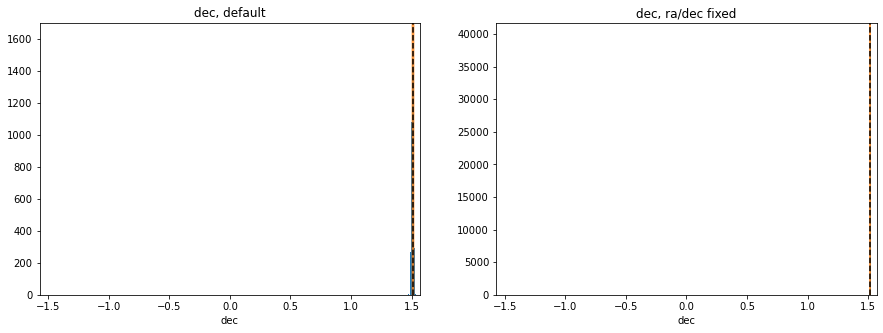

In [48]:
param_plot("dec", xlim=(-np.pi/2, np.pi/2))

In [17]:
pd.DataFrame(run_data).to_csv('data/fix_results.csv', mode='a', index=False, header=False)